In [24]:
import numpy as np
import pandas as pd
import os

data_dir = r'reference\step3_practice\ch02_Bearing_failure_Anomaly_Detection\chapter02_df'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = pd.concat([merged_data, dataset_mean_abs])
    
merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']
merged_data.head()

    

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004.02.12.10.52.39,0.060236,0.074227,0.083926,0.044443
2004.02.12.11.02.39,0.061455,0.073844,0.084457,0.045081
2004.02.12.11.12.39,0.061361,0.075609,0.082837,0.045118
2004.02.12.11.22.39,0.061665,0.073279,0.084879,0.044172
2004.02.12.11.32.39,0.061944,0.074593,0.082626,0.044659


In [25]:
# ▶ date index 시간형태 변환
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('Averaged_BearingTest_Dataset.csv')
print("Dataset shape:", merged_data.shape)
merged_data.head()

Dataset shape: (982, 4)


,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [26]:
# ▶ pd.set option
import pandas as pd 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)  

# ▶ Data read
df = pd.read_csv("Averaged_BearingTest_Dataset.csv")
df.head()

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [27]:
df.columns = ['time', 'Bearing1',	'Bearing2'	,'Bearing3',	'Bearing4']
df.head()

,time,Bearing1,Bearing2,Bearing3,Bearing4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [28]:
# ▶ Data 형태 확인
# ▶ 982 row, 5 col로 구성됨
print('df :', df.shape)

df : (982, 5)


In [29]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      982 non-null    object 
 1   Bearing1  982 non-null    float64
 2   Bearing2  982 non-null    float64
 3   Bearing3  982 non-null    float64
 4   Bearing4  982 non-null    float64
dtypes: float64(4), object(1)
memory usage: 38.5+ KB


In [30]:
# ▶ Null 값 확인
print(df.isnull().sum())

time        0
Bearing1    0
Bearing2    0
Bearing3    0
Bearing4    0
dtype: int64


In [31]:
# ▶ Outlier 확인
df.describe()

,Bearing1,Bearing2,Bearing3,Bearing4
count,982.000000,982.000000,982.000000,982.000000
mean,0.080951,0.078543,0.081351,0.047830
std,0.040200,0.011789,0.011607,0.009549
min,0.001168,0.000767,0.000716,0.001699
25%,0.060773,0.074240,0.076829,0.043951
50%,0.062021,0.075206,0.078187,0.044524
75%,0.083277,0.077458,0.080575,0.048130
max,0.453335,0.161016,0.151299,0.119047


In [32]:
df.head()

,time,Bearing1,Bearing2,Bearing3,Bearing4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [33]:
# ▶ 시간형태 데이터 타입 변경 및 Index 설정
df['time'] = pd.to_datetime(df['time'])
df.set_index('time',inplace=True)

In [34]:
# ▶ Index name 변경
df.index.name=''

In [35]:
df.head()

,Bearing1,Bearing2,Bearing3,Bearing4
,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [36]:
df.index.min(), df.index.max()


(Timestamp('2004-02-12 10:52:39'), Timestamp('2004-02-19 06:22:39'))

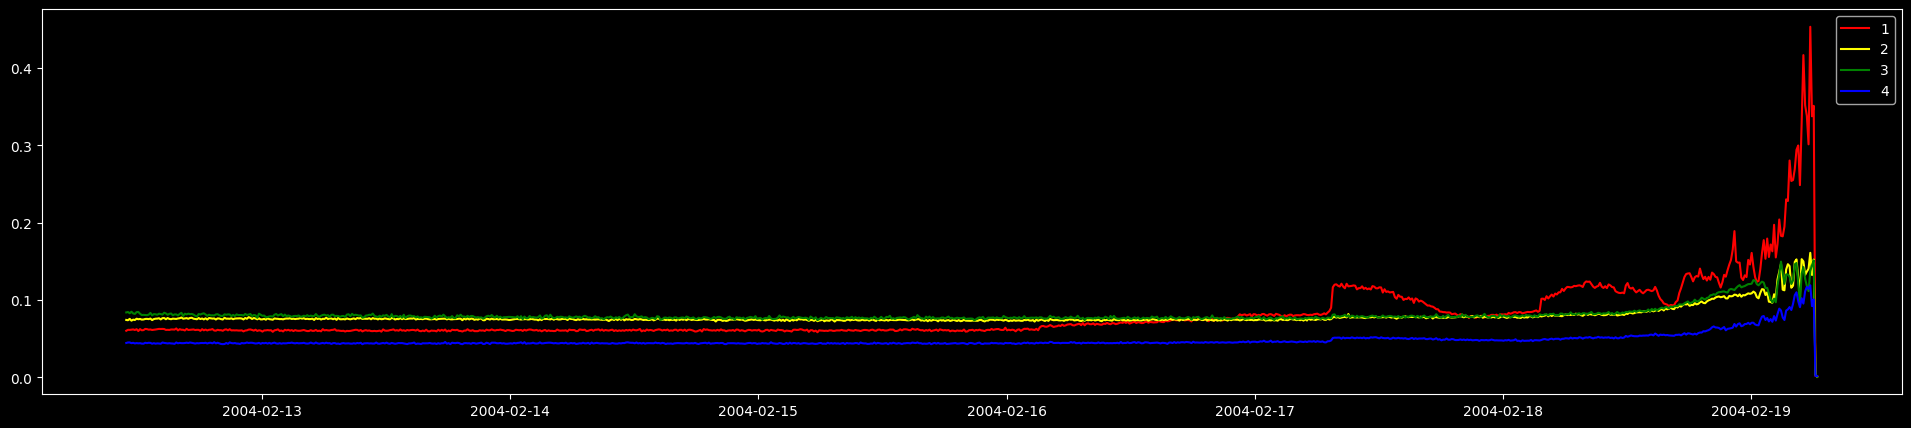

In [37]:
# ▶ Plotting 전체 데이터 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

plt.figure(figsize=(24,5))
plt.plot(df.index, df['Bearing1'], linestyle='-', color='red', label='1');
plt.plot(df.index, df['Bearing2'], linestyle='-', color='yellow', label='2');
plt.plot(df.index, df['Bearing3'], linestyle='-', color='green', label='3');
plt.plot(df.index, df['Bearing4'], linestyle='-', color='blue', label='4');
plt.legend();

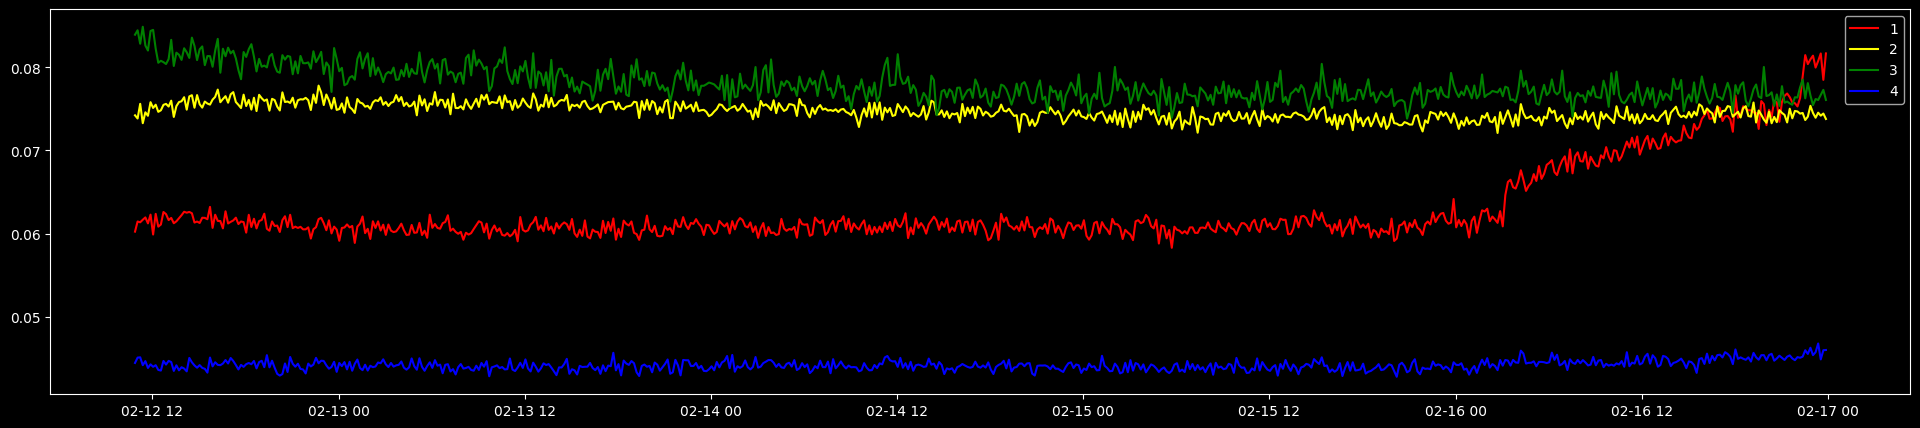

In [38]:
# ▶ Before Data 기간 확인
df_before = df[:'2004-02-17 00:00:00']

plt.figure(figsize=(24,5))
plt.plot(df_before.index, df_before['Bearing1'], linestyle='-', color='red', label='1');
plt.plot(df_before.index, df_before['Bearing2'], linestyle='-', color='yellow', label='2');
plt.plot(df_before.index, df_before['Bearing3'], linestyle='-', color='green', label='3');
plt.plot(df_before.index, df_before['Bearing4'], linestyle='-', color='blue', label='4');
plt.legend();

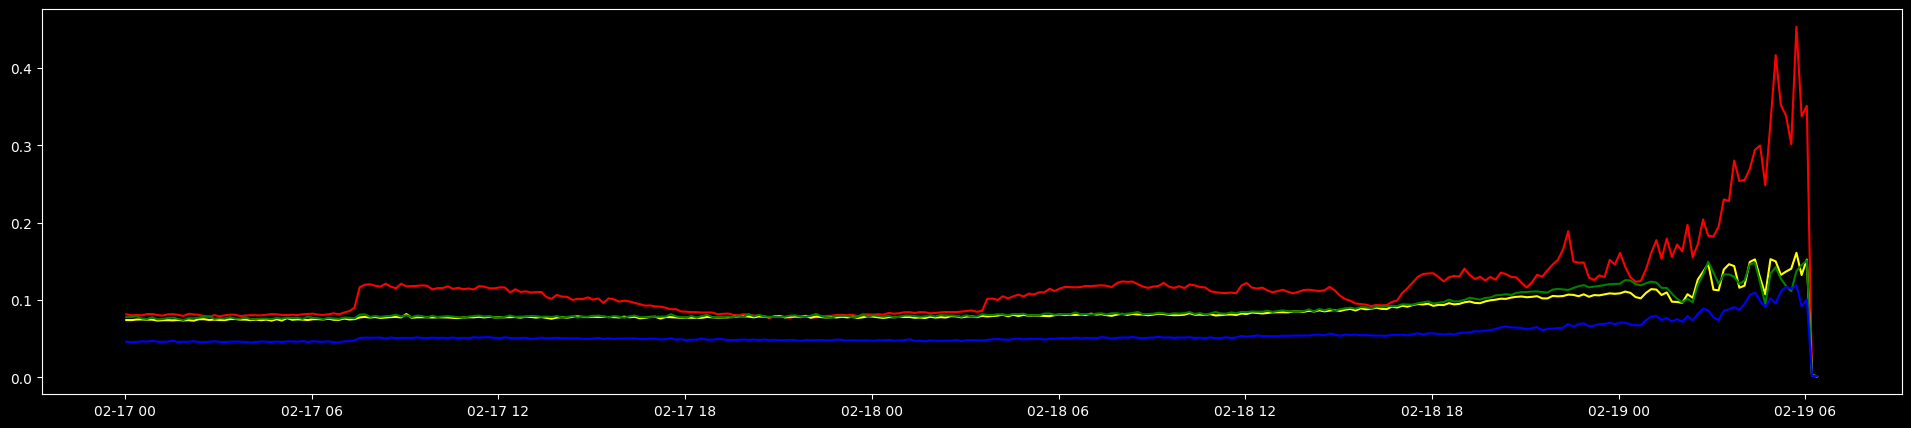

In [39]:
# ▶ After Data 기간 확인
df_after = df['2004-02-17 00:00:00':]

plt.figure(figsize=(24,5))
plt.plot(df_after.index, df_after['Bearing1'], linestyle='-', color='red', label='1');
plt.plot(df_after.index, df_after['Bearing2'], linestyle='-', color='yellow', label='2');
plt.plot(df_after.index, df_after['Bearing3'], linestyle='-', color='green', label='3');
plt.plot(df_after.index, df_after['Bearing4'], linestyle='-', color='blue', label='4');

C:\Users\KMS\AppData\Local\Temp\ipykernel_18400\665884667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bearing1'])


<Axes: xlabel='Bearing1', ylabel='Density'>

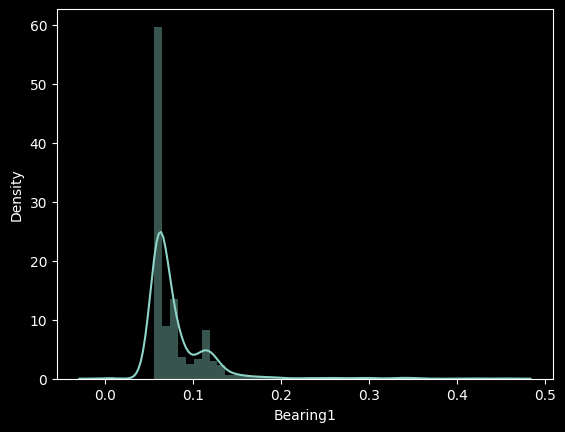

In [40]:
sns.distplot(df['Bearing1'])

In [41]:
# ▶ 데이터 확인
df.head()

,Bearing1,Bearing2,Bearing3,Bearing4
,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [42]:
# ▶ 년, 월, 요일, 시간
# [참조] x.year, x.month, x.day, x.hour, x.minute, x.second, x.microsecond, x.weekday()
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday']= df.index.weekday
df['hour']= df.index.hour
df['date'] = df.index.date
df.head()

,Bearing1,Bearing2,Bearing3,Bearing4,year,month,weekday,hour,date
,,,,,,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,2004,2,3,10,2004-02-12
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,2004,2,3,11,2004-02-12
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,2004,2,3,11,2004-02-12
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172,2004,2,3,11,2004-02-12
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659,2004,2,3,11,2004-02-12


In [43]:
df.columns[0:4]

Index(['Bearing1', 'Bearing2', 'Bearing3', 'Bearing4'], dtype='object')

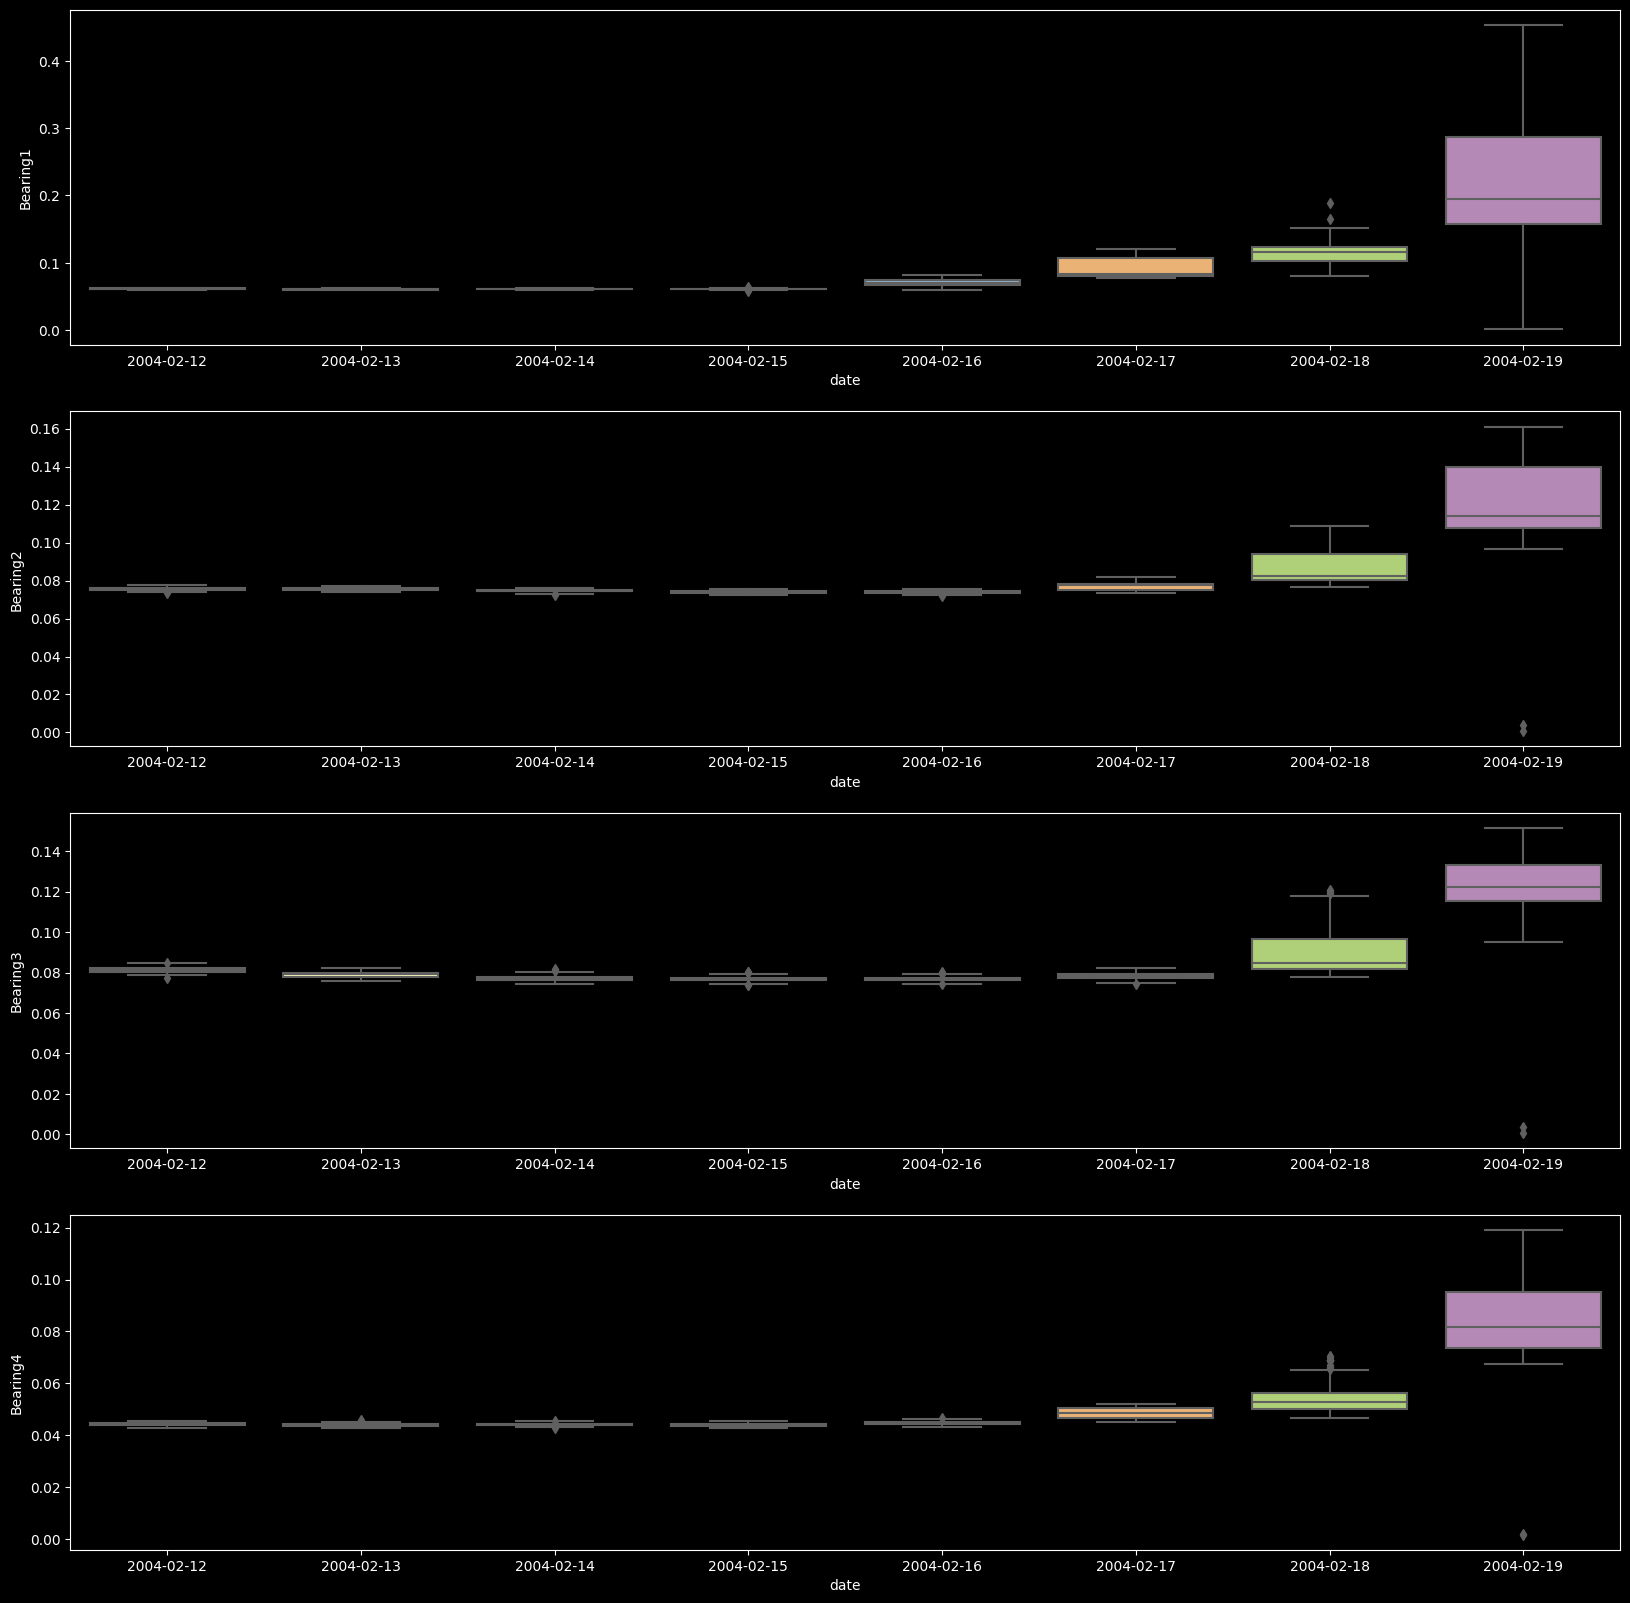

In [44]:
# ▶ Box plot 활용 일 별 Bearing 분포 확인
col_n = 1
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(df.columns[0:4]):
    sns.boxplot(x='date', y=col, data= df, ax=ax[int(i%row_n)])

In [45]:
df.head()

,Bearing1,Bearing2,Bearing3,Bearing4,year,month,weekday,hour,date
,,,,,,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,2004,2,3,10,2004-02-12
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,2004,2,3,11,2004-02-12
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,2004,2,3,11,2004-02-12
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172,2004,2,3,11,2004-02-12
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659,2004,2,3,11,2004-02-12


In [46]:
# ▶ shift 명령어 사용 , lag 데이터 생성
df['Bearing1_lag'] = df['Bearing1'].shift(1)
df[['Bearing1', 'Bearing1_lag']]

,Bearing1,Bearing1_lag
,,
2004-02-12 10:52:39,0.060236,NaN
2004-02-12 11:02:39,0.061455,0.060236
2004-02-12 11:12:39,0.061361,0.061455
2004-02-12 11:22:39,0.061665,0.061361
2004-02-12 11:32:39,0.061944,0.061665
...,...,...
2004-02-19 05:42:39,0.453335,0.301344
2004-02-19 05:52:39,0.337583,0.453335
2004-02-19 06:02:39,0.351111,0.337583


In [47]:
# ▶ 'fill_value' = 0 옵션을 통해 NaN 값 처리
df['Bearing1_lag'] = df['Bearing1'].shift(1, fill_value=df['Bearing1'][0])
df[['Bearing1', 'Bearing1_lag']]

,Bearing1,Bearing1_lag
,,
2004-02-12 10:52:39,0.060236,0.060236
2004-02-12 11:02:39,0.061455,0.060236
2004-02-12 11:12:39,0.061361,0.061455
2004-02-12 11:22:39,0.061665,0.061361
2004-02-12 11:32:39,0.061944,0.061665
...,...,...
2004-02-19 05:42:39,0.453335,0.301344
2004-02-19 05:52:39,0.337583,0.453335
2004-02-19 06:02:39,0.351111,0.337583


In [48]:
# ▶ Shift(n)을 통해 지연 기간 조정 가능
df['Bearing1_lag1'] = df['Bearing1'].shift(1, fill_value=0)
df['Bearing1_lag2'] = df['Bearing1'].shift(2, fill_value=0)
df[['Bearing1', 'Bearing1_lag1', 'Bearing1_lag2']]

,Bearing1,Bearing1_lag1,Bearing1_lag2
,,,
2004-02-12 10:52:39,0.060236,0.000000,0.000000
2004-02-12 11:02:39,0.061455,0.060236,0.000000
2004-02-12 11:12:39,0.061361,0.061455,0.060236
2004-02-12 11:22:39,0.061665,0.061361,0.061455
2004-02-12 11:32:39,0.061944,0.061665,0.061361
...,...,...,...
2004-02-19 05:42:39,0.453335,0.301344,0.338265
2004-02-19 05:52:39,0.337583,0.453335,0.301344
2004-02-19 06:02:39,0.351111,0.337583,0.453335


In [49]:
# ▶ rolling 명령어 사용 이동 평균 생성
df['bearing1_ma_3'] = df['Bearing1'].rolling(window=3).mean()
df[['Bearing1', 'bearing1_ma_3']]

,Bearing1,bearing1_ma_3
,,
2004-02-12 10:52:39,0.060236,NaN
2004-02-12 11:02:39,0.061455,NaN
2004-02-12 11:12:39,0.061361,0.061018
2004-02-12 11:22:39,0.061665,0.061494
2004-02-12 11:32:39,0.061944,0.061656
...,...,...
2004-02-19 05:42:39,0.453335,0.364315
2004-02-19 05:52:39,0.337583,0.364087
2004-02-19 06:02:39,0.351111,0.380676


In [50]:
# ▶ NaN 값 처리 
df['bearing1_ma_3'].fillna(df['Bearing1'], inplace=True)
df[['Bearing1', 'bearing1_ma_3']]

,Bearing1,bearing1_ma_3
,,
2004-02-12 10:52:39,0.060236,0.060236
2004-02-12 11:02:39,0.061455,0.061455
2004-02-12 11:12:39,0.061361,0.061018
2004-02-12 11:22:39,0.061665,0.061494
2004-02-12 11:32:39,0.061944,0.061656
...,...,...
2004-02-19 05:42:39,0.453335,0.364315
2004-02-19 05:52:39,0.337583,0.364087
2004-02-19 06:02:39,0.351111,0.380676


In [51]:
df.head()

,Bearing1,Bearing2,Bearing3,Bearing4,year,month,weekday,hour,date,Bearing1_lag,Bearing1_lag1,Bearing1_lag2,bearing1_ma_3
,,,,,,,,,,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,2004,2,3,10,2004-02-12,0.060236,0.000000,0.000000,0.060236
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,2004,2,3,11,2004-02-12,0.060236,0.060236,0.000000,0.061455
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,2004,2,3,11,2004-02-12,0.061455,0.061455,0.060236,0.061018
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172,2004,2,3,11,2004-02-12,0.061361,0.061361,0.061455,0.061494
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659,2004,2,3,11,2004-02-12,0.061665,0.061665,0.061361,0.061656


In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df = df[['Bearing1', 'Bearing2', 'Bearing3', 'Bearing4']]


# ▶ Create scaler: scaler
scaler = StandardScaler()

# ▶ Create a PCA instance: pca
pca = PCA()

# ▶ Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

pipeline.fit(df)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [53]:
# ▶ pca.n_components_(차원 축소 주성분 개수)
features = range(pca.n_components_)
feature_df=pd.DataFrame(data=features,columns=['pc_feature'])

# ▶ pca.explained_variance_ratio_(설명력)
variance_df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variance'])
pc_feature_df=pd.concat([feature_df,variance_df],axis=1)
pc_feature_df

# ▶ PC0, PC1으로도 전체 분산에 95% 이상 설명 가능

,pc_feature,variance
0,0,0.935243
1,1,0.052920
2,2,0.007789
3,3,0.004048


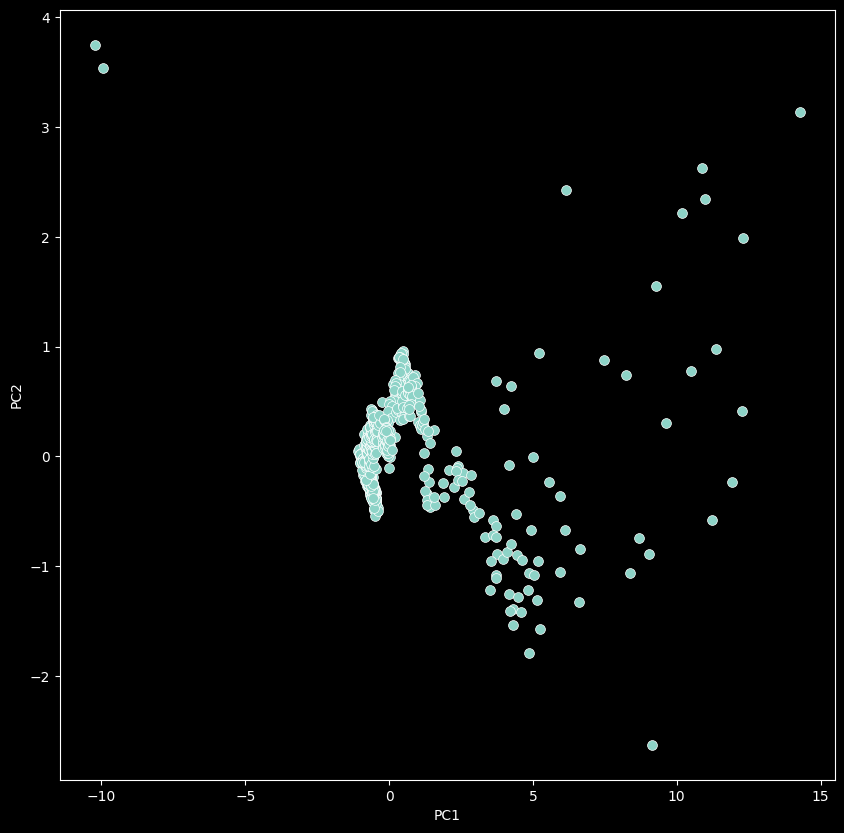

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

# ▶ 정규화
X_ = StandardScaler().fit_transform(df)

# ▶ 2개의 주성분으로 차원 축소
pca = PCA(n_components=2)
pc = pca.fit_transform(X_)

pc_df=pd.DataFrame(pc,columns=['PC1', 'PC2']).reset_index(drop=True)

plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot(data=pc_df,x='PC1',y='PC2', legend='brief', s=50, linewidth=0.5);

# ▶ 각 클러스터 중심에서 멀리 떨어진 Data 일 수록 이상치

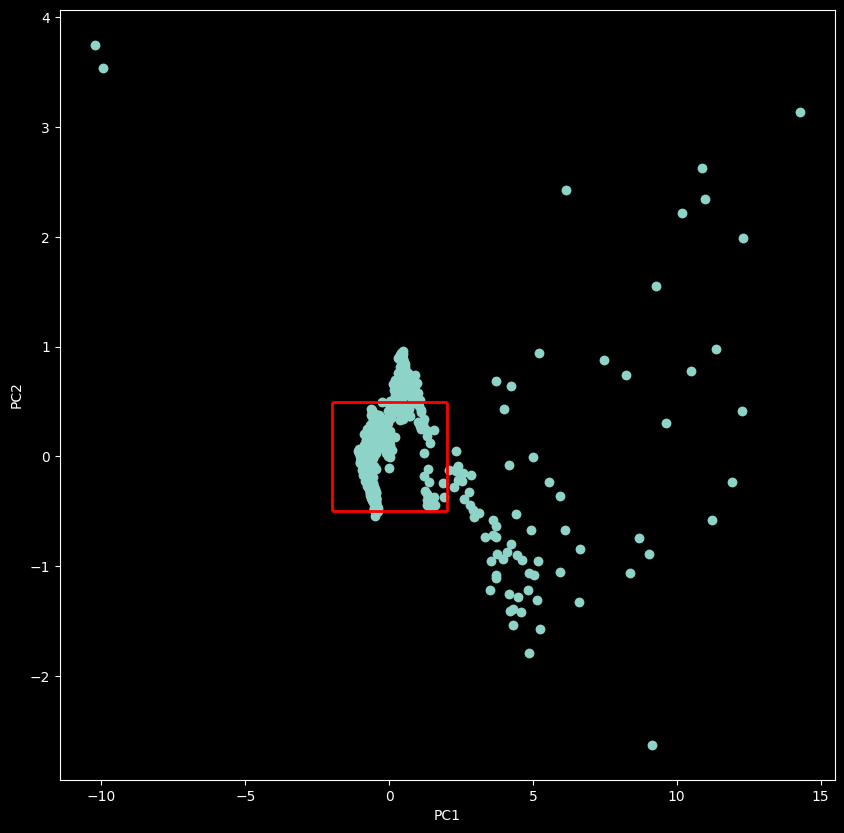

In [55]:
# ▶ PC1, PC2인 차원 축소 변수 2, -2를 기준으로 등급을 부여

sns.scatterplot(data=pc_df,x='PC1',y='PC2', s=50, linewidth=0);

# ▶ Normal grade
plt.vlines(-2, ymin=-0.5, ymax=0.5, color='r', linewidth=2);
plt.vlines(2, ymin=-0.5, ymax=0.5, color='r', linewidth=2);

plt.hlines(-0.5, xmin=-2, xmax=2, color='r', linewidth=2);
plt.hlines(0.5, xmin=-2, xmax=2, color='r', linewidth=2);

plt.gcf().set_size_inches(10, 10)

In [56]:
# ▶ np.where 활용 if문 
import numpy as np
pc_df['abnormal'] = np.where( (pc_df['PC1']>-2) & (pc_df['PC1']<2) & (pc_df['PC2']>-0.5) & (pc_df['PC2']<0.5), 0, 1)
pc_df.head(5)

,PC1,PC2,abnormal
0,-0.509598,-0.478672,0
1,-0.454730,-0.465373,0
2,-0.446235,-0.416285,0
3,-0.507399,-0.490065,0
4,-0.516699,-0.381590,0


In [57]:
pc_df['abnormal'].value_counts()

abnormal
0    813
1    169
Name: count, dtype: int64

In [58]:
# ▶ 기존 Data의 index를 부여
pc_df.index = df.index
pc_df.head()

,PC1,PC2,abnormal
,,,
2004-02-12 10:52:39,-0.509598,-0.478672,0
2004-02-12 11:02:39,-0.454730,-0.465373,0
2004-02-12 11:12:39,-0.446235,-0.416285,0
2004-02-12 11:22:39,-0.507399,-0.490065,0
2004-02-12 11:32:39,-0.516699,-0.381590,0


In [59]:
# ▶ 기존 data와 Concat
df_concat = pd.concat([df, pc_df], axis=1)
df_concat.head()

,Bearing1,Bearing2,Bearing3,Bearing4,PC1,PC2,abnormal
,,,,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,-0.509598,-0.478672,0
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,-0.454730,-0.465373,0
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,-0.446235,-0.416285,0
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172,-0.507399,-0.490065,0
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659,-0.516699,-0.381590,0


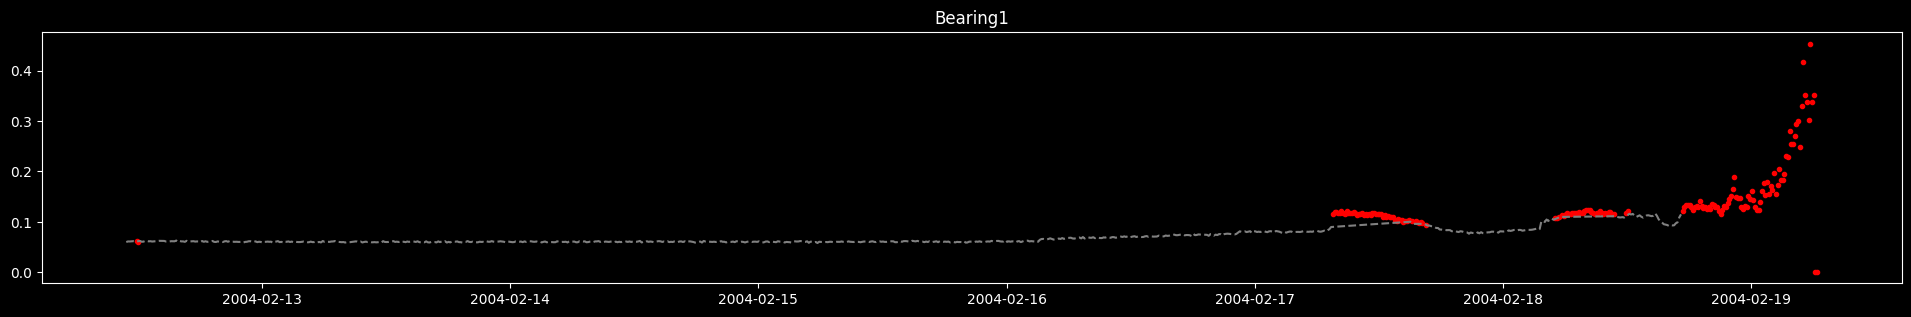

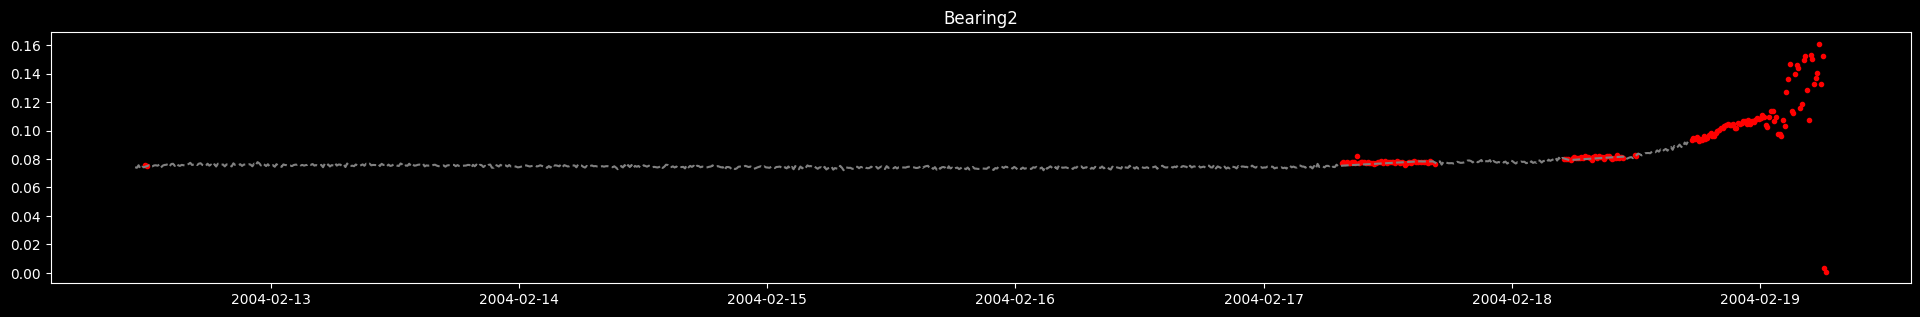

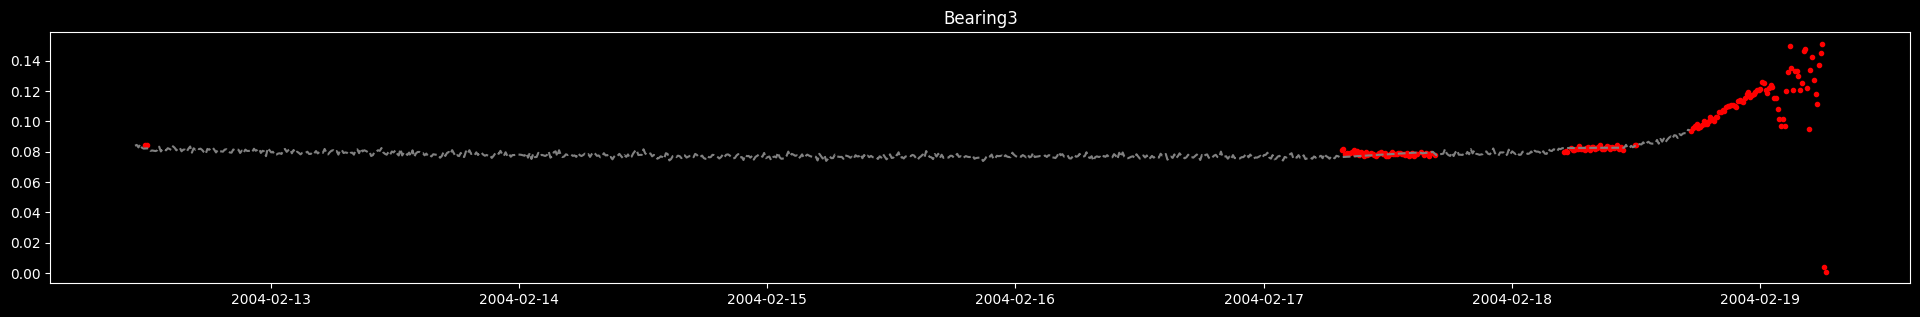

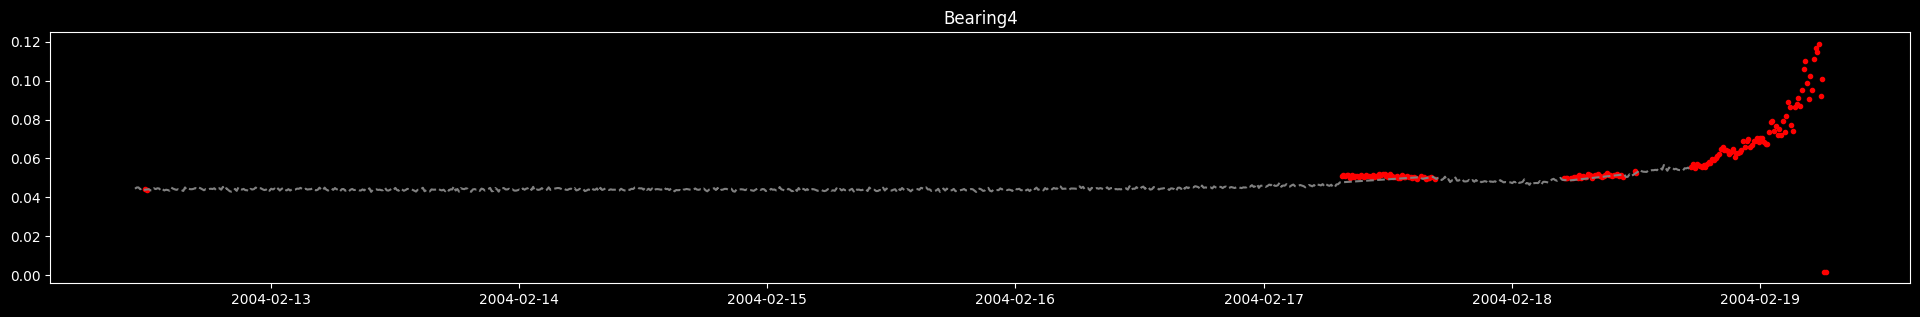

In [60]:
# ▶ Anomaly Points Plot

df_abnormal = df_concat[df_concat['abnormal']==1]
df_normal = df_concat[df_concat['abnormal']==0]

for v, i in  enumerate(df.columns[0:4]) :
  plt.figure(figsize=(24,15))
  plt.subplot(4, 1, v+1)
  plt.plot(df_abnormal.index, df_abnormal[i], 'o', color='red', markersize=3);
  plt.plot(df_normal.index, df_normal[i], linestyle='--', color='grey');
  plt.title(i)